###Importing Proper Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

###Loading CSV Files

In [ ]:
au_train = pd.read_csv('au_train.csv', na_values=" ?")
au_test = pd.read_csv('au_test.csv', na_values=" ?")

In [ ]:
au_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
au_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


###Initial Data Overview

By running the info function on the dataframe, we quickly answer many important questions.
- We are given the total number of records for each columns.
- Because everything is non-null (or at least before we passed the na_values through read.csv) all attributes for each individual has an assigned value.
- The dtype of each column is important to know as well as one thinks ahead to data cleaning and modeling.

In [ ]:
au_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
au_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
au_train.isnull().values.any()

True

In [ ]:
au_test.isnull().values.any()

True

###Data Cleaning

Viewing all columns with non-integer dtypes provides more information.
- 'fnlwgt' is a column with no inherent description and contains 21648 unique values. Therefore, I will drop this column since I am uncertain of its value to the model. In the future if more information is given, and it is proven to be a significant number, I would probably bin them into categories.
- Additionally, I will be dropping "education" since it is redundant with "education-num".
- All string values have fronted white spaces, which could cause confusion. Therefore, all white spaces are stripped.
- Next, although there are techinically no null values, it seems those that should be be null were replaced with " ?". This will be corrected by replacing "?" with nan values in the loading cell.
- When looking at the test set, there are also "."s after each value in *class*. Those will also be scrubbed.
- When viewing the unique values, with respective to the object columns there is a difference between the test and training set in only one instance: the test set is missing "Holland-Netherlands". Since I am creating dummy values already for the sets (and since the dictionaries created from the unique values isn't long and there's only one difference), I will add a column to the test set with 0s under a new "Holand-Netherlands" columns to create a joint number of features. Not doing so would result in uneven training and testing features.

In [ ]:
au_train = au_train.drop(columns=['fnlwgt', 'education'])
au_test = au_test.drop(columns=['fnlwgt', 'education'])

In [ ]:
object_columns = ['workclass','marital-status','occupation',
                  'relationship','race','sex','native-country', 'class']

num_columns = ['age','education-num','capital-gain',
               'capital-loss','hours-per-week']

print("Object Columns: Training Set")
for x in au_train[object_columns]:
  j = au_train[x].nunique()
  print(x, "has ", j, "unique values.")

print("\nInteger Columns: Training Set")
for x in au_train[num_columns]:
  j = au_train[x].nunique()
  print(x, "has ", j, "unique values.")

print("\nObject Columns: Test Set")
for x in au_test[object_columns]:
  j = au_test[x].nunique()
  print(x, "has ", j, "unique values.")

print("\nInteger Columns: Test Set")
for x in au_test[num_columns]:
  j = au_test[x].nunique()
  print(x, "has ", j, "unique values.")

Object Columns: Training Set
workclass has  8 unique values.
marital-status has  7 unique values.
occupation has  14 unique values.
relationship has  6 unique values.
race has  5 unique values.
sex has  2 unique values.
native-country has  41 unique values.
class has  2 unique values.

Integer Columns: Training Set
age has  73 unique values.
education-num has  16 unique values.
capital-gain has  119 unique values.
capital-loss has  92 unique values.
hours-per-week has  94 unique values.

Object Columns: Test Set
workclass has  8 unique values.
marital-status has  7 unique values.
occupation has  14 unique values.
relationship has  6 unique values.
race has  5 unique values.
sex has  2 unique values.
native-country has  40 unique values.
class has  2 unique values.

Integer Columns: Test Set
age has  73 unique values.
education-num has  16 unique values.
capital-gain has  113 unique values.
capital-loss has  82 unique values.
hours-per-week has  89 unique values.


In [ ]:
def see_unique(x):
  print(x.workclass.unique())
  print(x['marital-status'].unique())
  print(x.occupation.unique())
  print(x.relationship.unique())
  print(x.race.unique())
  print(x.sex.unique())
  print(x['native-country'].unique())
  print(x['class'].unique())

see_unique(au_train)

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' nan ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala'

In [ ]:
see_unique(au_test)

[' Private' ' Local-gov' nan ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' nan
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']
[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']
[' Male' ' Female']
[' United-States' nan ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland' ' Germany' ' Philippines' ' Thailand' ' Haiti' ' El-Salvador'
 ' Puerto-Rico' ' Vietnam' ' South' ' Columbia' ' Japan' ' India'
 ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba' ' Taiwan' ' Italy'
 ' Canada' ' Portugal' ' China' ' N

In [ ]:
au_train = au_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
au_test = au_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
au_test = au_test.apply(lambda x: x.str.strip('.') if x.dtype == 'object' else x)
print(see_unique(au_train))
print(see_unique(au_test))

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Sc

In [ ]:
print(au_train.isnull().sum())
print("{:.2%} of workclass is null.".format(au_train['workclass'].isnull().sum()/au_train['workclass'].count()))
print("{:.2%} of occupation is null.".format(au_train['occupation'].isnull().sum()/au_train['occupation'].count()))
print("{:.2%} of native-country is null.".format(au_train['native-country'].isnull().sum()/au_train['native-country'].count()))

age                  0
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64
5.98% of workclass is null.
6.00% of occupation is null.
1.82% of native-country is null.


In [ ]:
print(au_test.isnull().sum())
print("{:.2%} of workclass is null.".format(au_test['workclass'].isnull().sum()/au_test['workclass'].count()))
print("{:.2%} of occupation is null.".format(au_test['occupation'].isnull().sum()/au_test['occupation'].count()))
print("{:.2%} of native-country is null.".format(au_test['native-country'].isnull().sum()/au_test['native-country'].count()))

age                 0
workclass         963
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64
6.29% of workclass is null.
6.31% of occupation is null.
1.71% of native-country is null.


In [ ]:
country_train = dict(au_train[['native-country']].value_counts())
country_train

{('Cambodia',): 19,
 ('Canada',): 121,
 ('China',): 75,
 ('Columbia',): 59,
 ('Cuba',): 95,
 ('Dominican-Republic',): 70,
 ('Ecuador',): 28,
 ('El-Salvador',): 106,
 ('England',): 90,
 ('France',): 29,
 ('Germany',): 137,
 ('Greece',): 29,
 ('Guatemala',): 64,
 ('Haiti',): 44,
 ('Holand-Netherlands',): 1,
 ('Honduras',): 13,
 ('Hong',): 20,
 ('Hungary',): 13,
 ('India',): 100,
 ('Iran',): 43,
 ('Ireland',): 24,
 ('Italy',): 73,
 ('Jamaica',): 81,
 ('Japan',): 62,
 ('Laos',): 18,
 ('Mexico',): 643,
 ('Nicaragua',): 34,
 ('Outlying-US(Guam-USVI-etc)',): 14,
 ('Peru',): 31,
 ('Philippines',): 198,
 ('Poland',): 60,
 ('Portugal',): 37,
 ('Puerto-Rico',): 114,
 ('Scotland',): 12,
 ('South',): 80,
 ('Taiwan',): 51,
 ('Thailand',): 18,
 ('Trinadad&Tobago',): 19,
 ('United-States',): 29170,
 ('Vietnam',): 67,
 ('Yugoslavia',): 16}

In [ ]:
country_test = dict(au_test[['native-country']].value_counts())
country_test

#add Holand-Netherlands,

{('Cambodia',): 9,
 ('Canada',): 61,
 ('China',): 47,
 ('Columbia',): 26,
 ('Cuba',): 43,
 ('Dominican-Republic',): 33,
 ('Ecuador',): 17,
 ('El-Salvador',): 49,
 ('England',): 37,
 ('France',): 9,
 ('Germany',): 69,
 ('Greece',): 20,
 ('Guatemala',): 24,
 ('Haiti',): 31,
 ('Honduras',): 7,
 ('Hong',): 10,
 ('Hungary',): 6,
 ('India',): 51,
 ('Iran',): 16,
 ('Ireland',): 13,
 ('Italy',): 32,
 ('Jamaica',): 25,
 ('Japan',): 30,
 ('Laos',): 5,
 ('Mexico',): 308,
 ('Nicaragua',): 15,
 ('Outlying-US(Guam-USVI-etc)',): 9,
 ('Peru',): 15,
 ('Philippines',): 97,
 ('Poland',): 27,
 ('Portugal',): 30,
 ('Puerto-Rico',): 70,
 ('Scotland',): 9,
 ('South',): 35,
 ('Taiwan',): 14,
 ('Thailand',): 12,
 ('Trinadad&Tobago',): 8,
 ('United-States',): 14662,
 ('Vietnam',): 19,
 ('Yugoslavia',): 7}

In [ ]:
au_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96db79d990>,
      dtype=object)

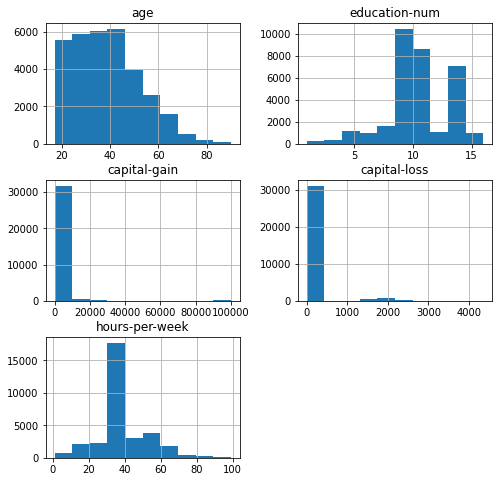

In [ ]:
au_train[num_columns].hist(figsize=(8,8))

In [ ]:
au_train = pd.get_dummies(au_train, columns=['workclass','marital-status','occupation',
                  'relationship','race','sex','native-country','class'], 
                prefix=['workclass','marital-status','occupation',
                  'relationship','race','sex','native-country','class'])

au_test = pd.get_dummies(au_test, columns=['workclass','marital-status','occupation',
                  'relationship','race','sex','native-country','class'], 
                prefix=['workclass','marital-status','occupation',
                  'relationship','race','sex','native-country','class'])

In [ ]:
au_test['native-country_Holand-Netherlands'] = 0

In [ ]:
au_test = au_test.drop('class_<=50K', axis=1)
au_train = au_train.drop('class_<=50K', axis=1)

###Classification Algorithms


Since the question being targeted is categorical, I will deploy three of the most common classification algorithms:
- Logistic Regression
- Decision Tree Classifier

In [ ]:
X_train = au_train.drop("class_>50K", axis=1)
y_train = au_train['class_>50K']
X_test = au_test.drop('class_>50K', axis=1)
y_test = au_test['class_>50K']

####Logistic Regression

In [ ]:
LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)

LR_coef_table = pd.DataFrame(list(X_train.columns)).copy()
LR_coef_table.insert(len(LR_coef_table.columns), "Coefs", LR_model.coef_.transpose())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
LR_predictions = LR_model.predict(X_test)

In [ ]:
LR_acc = accuracy_score(y_test, LR_predictions)
LR_acc

0.8315214053190836

In [ ]:
print("Logistic Regression Testing Accuracy: ", LR_acc)
confusion_matrix(list(y_test), LR_predictions)

Logistic Regression Testing Accuracy:  0.8315214053190836


array([[11116,  1319],
       [ 1424,  2422]])

                                    0     Coefs
15  marital-status_Married-civ-spouse  0.596840
23         occupation_Exec-managerial  0.565984
29          occupation_Prof-specialty  0.469547
34               relationship_Husband  0.305590
39                  relationship_Wife  0.323916


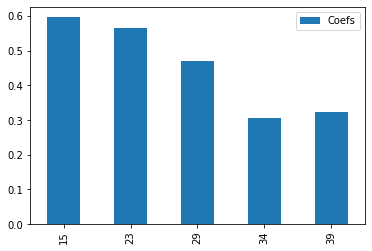

In [ ]:
print(LR_coef_table[LR_coef_table.Coefs > .3])

LR_top_coef = LR_coef_table[LR_coef_table.Coefs > .3]

LR_top_coef.plot(kind='bar')

####Decision Tree Classifier

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_coef_table = pd.DataFrame(list(X_train.columns)).copy()
DT_coef_table.insert(len(DT_coef_table.columns), "Coefs", DT_model.feature_importances_.transpose())

In [ ]:
DT_predictions = DT_model.predict(X_test)

In [ ]:
DT_acc = accuracy_score(y_test, DT_predictions)
DT_acc

0.8067686260057736

In [ ]:
print("Decision Tree Testing Accuracy: ", DT_acc)
confusion_matrix(list(y_test), DT_predictions)

Decision Tree Testing Accuracy:  0.8067686260057736


array([[10826,  1609],
       [ 1537,  2309]])

                                    0     Coefs
15  marital-status_Married-civ-spouse  0.214150
0                                 age  0.162470
1                       education-num  0.145566
2                        capital-gain  0.119049
4                      hours-per-week  0.100577


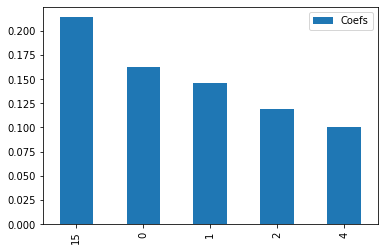

In [ ]:
DT_sorted_coef = DT_coef_table.sort_values(by='Coefs', ascending=False)[0:5]
print(DT_sorted_coef)
DT_sorted_coef.plot(kind='bar')